In [7]:
from skimage.io import imread, imsave, imshow
from skimage.filters import sobel_h, sobel_v
from skimage.color import rgb2gray
from skimage import feature
import numpy as np
%matplotlib inline

In [19]:
img = rgb2gray(imread('public_tests/00_test_img_input/train/00000.png'))
img1 = rgb2gray(imread('public_tests/00_test_img_input/train/00029.png'))

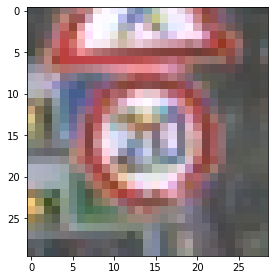

In [11]:
imshow(img)

In [12]:
imshow(sobel_v(img))

ValueError: The parameter `image` must be a 2-dimensional array

In [17]:
def grad_magn_orient(img):
    dx = sobel_h(img)
    dy = sobel_v(img)
    return np.hypot(dx, dy), np.pi + np.arctan2(dx, dy)

In [28]:
magn, orient = grad_magn_orient(img)

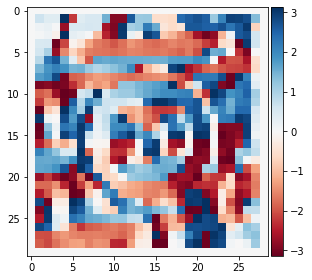

In [29]:
imshow(orient)

In [21]:
img.shape

(30, 29, 3)

In [111]:
bin_count = 8
hist_bins = np.arange(-np.pi, np.pi, 2 * np.pi / bin_count)

N_SEGMENTS = 8
seg_h = (img.shape[0] + N_SEGMENTS - 1) // N_SEGMENTS
seg_w = (img.shape[1] + N_SEGMENTS - 1) // N_SEGMENTS

In [132]:
def hog(img):
    bin_count = 8
    N_SEGMENTS = 8
    seg_h = (img.shape[0] + N_SEGMENTS - 1) // N_SEGMENTS
    seg_w = (img.shape[1] + N_SEGMENTS - 1) // N_SEGMENTS
    hist = np.zeros((N_SEGMENTS-1, N_SEGMENTS-1, bin_count))
    magn, orient = grad_magn_orient(img)
    for i in range(N_SEGMENTS-1):
        for j in range(N_SEGMENTS-1):
            orient_seg = orient[i*seg_h : (i+1)*seg_h, j*seg_w : (j+1)*seg_w]
            magn_seg = magn[i*seg_h : (i+1)*seg_h, j*seg_w : (j+1)*seg_w]
            hist[i, j] = np.histogram(orient_seg,
                         bins=bin_count,
                         range=(-np.pi, np.pi),
                         weights=magn_seg)[0]
            hist[i, j] / (np.linalg.norm(hist[i, j]) + 1e-6)
    return hist.flatten()

In [122]:
def sk_hog(img):
    return feature.hog(img,
        orientations=8,
        pixels_per_cell=((img.shape[0] + N_SEGMENTS - 1) // N_SEGMENTS,
                         (img.shape[1] + N_SEGMENTS - 1) // N_SEGMENTS),
        cells_per_block=(1, 1)
    )

In [134]:
hog(img1)

array([1.58412439e-01, 1.14633278e+01, 4.68438900e-01, 7.53090793e-02,
       4.82163465e-02, 8.14405176e+00, 8.93930349e-01, 8.36697893e-02,
       9.81221939e-02, 1.03718005e+01, 2.82106967e+00, 5.32772475e-02,
       1.29164748e-01, 8.71511863e+00, 7.48391624e-01, 6.18949075e-02,
       5.59358471e-02, 1.05139452e+01, 1.43423561e+00, 1.04206219e-01,
       2.53508485e-01, 1.61892221e+01, 9.78683091e-01, 7.72628564e-02,
       1.22979409e-01, 8.31414919e+00, 2.00597693e+00, 1.13011079e-01,
       3.50144952e-01, 9.08087502e+00, 2.13965458e+00, 5.00495459e-02,
       5.11855456e-01, 4.53588240e+00, 3.24989620e+00, 3.69180392e-01,
       9.44843842e-02, 6.42956925e+00, 5.30673287e+00, 3.46643090e-01,
       3.17274589e-01, 1.11092448e+01, 1.03660504e+00, 3.61694065e-02,
       4.66097894e-02, 7.92592708e+00, 6.93092618e+00, 3.70074438e-01,
       1.41244763e-01, 1.23214739e+01, 8.32655489e-01, 1.50039719e-01,
       8.51468562e-02, 8.13656987e+00, 7.56369089e-01, 2.12171288e-01,
      

In [135]:
def extract_hog(img):
    rhog = hog(img[..., 0])
    ghog = hog(img[..., 1])
    bhog = hog(img[..., 2])
    return np.concatenate((rhog, ghog, bhog))

In [143]:
extract_hog(img)

array([0.        , 0.        , 0.        , ..., 0.29046092, 0.        ,
       0.        ])

In [1]:
from notify import notify

In [2]:
notify('1')

In [3]:
import os
os.system('systemctl suspend')

0

In [23]:
def hog1(img):
    bin_count = 8
    N_SEGMENTS = 8
    seg_h = (img.shape[0] + N_SEGMENTS - 1) // N_SEGMENTS
    seg_w = (img.shape[1] + N_SEGMENTS - 1) // N_SEGMENTS
    hist = np.zeros((N_SEGMENTS-2, N_SEGMENTS-2, bin_count))
    magn, orient = grad_magn_orient(img)
    for i in range(1, N_SEGMENTS-1):
        for j in range(1, N_SEGMENTS-1):
            orient_seg = orient[i*seg_h : (i+1)*seg_h, j*seg_w : (j+1)*seg_w]
            magn_seg = magn[i*seg_h : (i+1)*seg_h, j*seg_w : (j+1)*seg_w]
            hist[i-1, j-1] = np.histogram(
                orient_seg,
                bins=bin_count,
                range=(-np.pi, np.pi),
                weights=magn_seg
            )[0]
            hist[i-1, j-1] /= (np.linalg.norm(hist[i-1, j-1]) + 1e-6)
    return hist.flatten()

In [24]:
def hog2(img):
    bin_count = 8
    N_SEGMENTS = 8
    seg_h = (img.shape[0] + N_SEGMENTS - 1) // N_SEGMENTS
    seg_w = (img.shape[1] + N_SEGMENTS - 1) // N_SEGMENTS
    hist = np.zeros((N_SEGMENTS-2, N_SEGMENTS-2, bin_count))
    magn, orient = grad_magn_orient(img)
    for i in range(1, N_SEGMENTS-1):
        for j in range(1, N_SEGMENTS-1):
            orient_seg = orient[i*seg_h : (i+1)*seg_h, j*seg_w : (j+1)*seg_w]
            magn_seg = magn[i*seg_h : (i+1)*seg_h, j*seg_w : (j+1)*seg_w]
            hist[i-1, j-1] = np.histogram(
                orient_seg,
                bins=bin_count,
                range=(-np.pi, np.pi),
                weights=magn_seg
            )[0]
    hist = hist.transpose((2,0,1))
    hist /= np.sqrt((hist ** 2).sum(axis=0)) + 1e-6
    return hist.flatten()

In [26]:
%%time
for i in range(1000):
    hog1(img1)

CPU times: user 37.6 s, sys: 0 ns, total: 37.6 s
Wall time: 37.5 s


In [27]:
%%time
for i in range(1000):
    hog2(img1)

CPU times: user 34.4 s, sys: 0 ns, total: 34.4 s
Wall time: 34.4 s
